# Tracking Data & Globus Retrieval of Video Files

## Imports

In [1]:
import datajoint as dj

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from pipeline import lab, experiment, ephys, tracking, publication, shell

Connecting chris@localhost:3306


## Querying Tracking Data

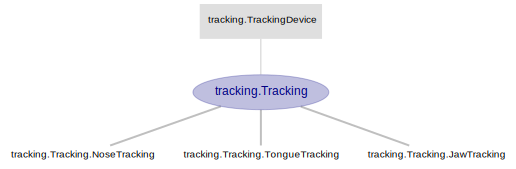

In [4]:
dj.Diagram(tracking)

In [5]:
good_tracking_units = tracking.Tracking.TongueTracking & ephys.Unit() & {'unit_quality': 'good'}

In [6]:
good_tracking_units

subject_id institution 6 digit animal ID,session session number,trial trial number,tracking_device device type/function,tongue_x tongue x location (px),tongue_y tongue y location (px),tongue_likelihood tongue location likelyhood
435884,1,11,Camera 0,=BLOB=,=BLOB=,=BLOB=
435884,1,12,Camera 0,=BLOB=,=BLOB=,=BLOB=
435884,1,13,Camera 0,=BLOB=,=BLOB=,=BLOB=
435884,1,14,Camera 0,=BLOB=,=BLOB=,=BLOB=
435884,1,15,Camera 0,=BLOB=,=BLOB=,=BLOB=
435884,1,16,Camera 0,=BLOB=,=BLOB=,=BLOB=
435884,1,17,Camera 0,=BLOB=,=BLOB=,=BLOB=


In [7]:
ephys.TrialSpikes & good_tracking_units

subject_id institution 6 digit animal ID,session session number,insertion_number,clustering_method,unit,trial trial number,"spike_times (s) spike times for each trial, relative to go cue"
435884,1,1,jrclust,1,100,=BLOB=
435884,1,1,jrclust,2,100,=BLOB=
435884,1,1,jrclust,3,100,=BLOB=
435884,1,1,jrclust,4,100,=BLOB=
435884,1,1,jrclust,5,100,=BLOB=
435884,1,1,jrclust,6,100,=BLOB=
435884,1,1,jrclust,7,100,=BLOB=


In [8]:
my_key = (ephys.TrialSpikes & good_tracking_units).fetch('KEY', limit=1)[0]

In [9]:
my_key

{'subject_id': 435884,
 'session': 1,
 'insertion_number': 1,
 'clustering_method': 'jrclust',
 'unit': 1,
 'trial': 100}

## Digging Deeper 

In [14]:
tracking_spikes = ephys.TrialSpikes * tracking.Tracking.TongueTracking

In [15]:
tracking_spikes

subject_id institution 6 digit animal ID,session session number,insertion_number,clustering_method,unit,trial trial number,tracking_device device type/function,"spike_times (s) spike times for each trial, relative to go cue",tongue_x tongue x location (px),tongue_y tongue y location (px),tongue_likelihood tongue location likelyhood
435884,1,1,jrclust,1,100,Camera 0,=BLOB=,=BLOB=,=BLOB=,=BLOB=
435884,1,1,jrclust,2,100,Camera 0,=BLOB=,=BLOB=,=BLOB=,=BLOB=
435884,1,1,jrclust,3,100,Camera 0,=BLOB=,=BLOB=,=BLOB=,=BLOB=
435884,1,1,jrclust,4,100,Camera 0,=BLOB=,=BLOB=,=BLOB=,=BLOB=
435884,1,1,jrclust,5,100,Camera 0,=BLOB=,=BLOB=,=BLOB=,=BLOB=
435884,1,1,jrclust,6,100,Camera 0,=BLOB=,=BLOB=,=BLOB=,=BLOB=
435884,1,1,jrclust,7,100,Camera 0,=BLOB=,=BLOB=,=BLOB=,=BLOB=


In [16]:
tracking_spikes & my_key

subject_id institution 6 digit animal ID,session session number,insertion_number,clustering_method,unit,trial trial number,tracking_device device type/function,"spike_times (s) spike times for each trial, relative to go cue",tongue_x tongue x location (px),tongue_y tongue y location (px),tongue_likelihood tongue location likelyhood
435884,1,1,jrclust,1,100,Camera 0,=BLOB=,=BLOB=,=BLOB=,=BLOB=


In [17]:
spikes, x, y = (tracking_spikes & my_key).fetch('spike_times', 'tongue_x', 'tongue_y')

In [18]:
spike_hist = np.histogram(spikes[0])

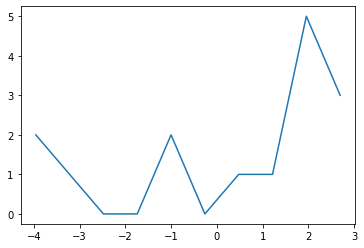

In [19]:
plt.plot(spike_hist[1][:-1], spike_hist[0])

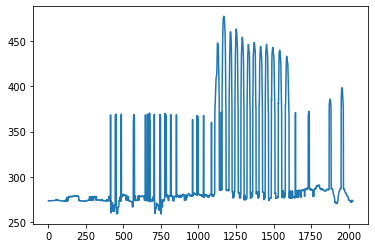

In [20]:
plt.plot(y[0])

## Globus Client Configuration

In [21]:
custom = dj.config['custom']

In [22]:
{k: v for k,v in custom.items() if 'globus' in k}

{'globus.storage_locations': [['raw-ephys',
   '5b875fda-4185-11e8-bb52-0ac6873fc732',
   'test_publication/raw-ephys'],
  ['raw-video',
   '5b875fda-4185-11e8-bb52-0ac6873fc732',
   'test_publication/raw-video']],
 'globus.local_endpoints': {'raw-ephys': {'endpoint': 'aa4e5f9c-05f3-11e8-a6ad-0a448319c2f8',
   'endpoint_subdir': '~/Globus/test_data/raw',
   'endpoint_path': '/Users/chris/Globus/test_data/raw'},
  'raw-video': {'endpoint': 'aa4e5f9c-05f3-11e8-a6ad-0a448319c2f8',
   'endpoint_subdir': '~/Globus/test_data/video',
   'endpoint_path': '/Users/chris/Globus/test_data/video'}},
 'globus.local_endpoint': 'aa4e5f9c-05f3-11e8-a6ad-0a448319c2f8',
 'globus.local_endpoint_subdir': '~/Globus/test_data/raw',
 'globus.local_endpoint_local_path': '/Users/chris/Globus/test_data/raw'}

## Globus Login (1x per configuraton)

In [23]:
publication.GlobusStorageManager()

Please login via: https://auth.globus.org/v2/oauth2/authorize?client_id=b2fe5703-edb0-4f7f-80a6-2147c8ae35f0&redirect_uri=https%3A%2F%2Fauth.globus.org%2Fv2%2Fweb%2Fauth-code&scope=openid+profile+email+urn%3Aglobus%3Aauth%3Ascope%3Atransfer.api.globus.org%3Aall&state=_default&response_type=code&code_challenge=qijyOsdFLVT0mH4G4jwS5CU2eWdjdJipGu6Oba3LOPA&code_challenge_method=S256&access_type=offline
and enter code:nMubsgoxIxsWntpmI9wr7uykVu3QiR


In [24]:
dj.config['custom']['globus.token']

'AgaMJk7Oobn7MX3gq4Q1vj0pxO2lDjnpz9J2jExvK3PmOkvkQNIrU40ogOxynkWaqnMrpbb2Pjdkq82pNDv20n54QrvKB'

In [25]:
dj.config.save_local()

## Publication Schema

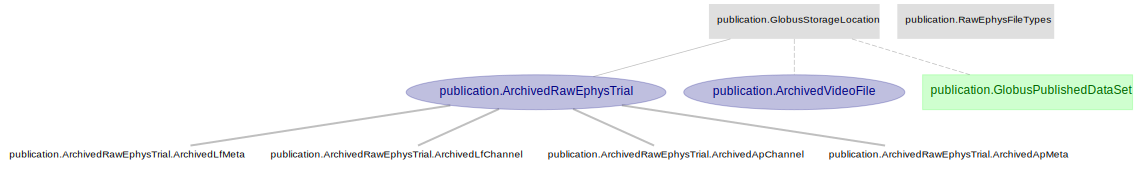

In [26]:
dj.Diagram(publication)

In [27]:
publication.ArchivedVideoFile()

subject_id institution 6 digit animal ID,session session number,trial trial number,tracking_device device type/function,globus_alias name for location (e.g. 'raw-ephys'),video_file_name file name for trial
435884,1,11,Camera 0,raw-video,dl59_side_19-0000.avi
435884,1,12,Camera 0,raw-video,dl59_side_20-0000.avi
435884,1,13,Camera 0,raw-video,dl59_side_21-0000.avi
435884,1,14,Camera 0,raw-video,dl59_side_22-0000.avi
435884,1,15,Camera 0,raw-video,dl59_side_23-0000.avi
435884,1,16,Camera 0,raw-video,dl59_side_24-0000.avi
435884,1,17,Camera 0,raw-video,dl59_side_25-0000.avi


In [28]:
publication.ArchivedVideoFile() & my_key

subject_id institution 6 digit animal ID,session session number,trial trial number,tracking_device device type/function,globus_alias name for location (e.g. 'raw-ephys'),video_file_name file name for trial
435884,1,100,Camera 0,raw-video,dl59_side_108-0000.avi


In [29]:
shell.logsetup('DEBUG')

In [30]:
(publication.ArchivedVideoFile() & my_key).retrieve()

DEBUG:pipeline.publication:{'subject_id': 435884, 'session': 1, 'trial': 100, 'tracking_device': 'Camera 0', 'globus_alias': 'raw-video', 'video_file_name': 'dl59_side_108-0000.avi'}
DEBUG:pipeline.publication:ArchivedVideoFile.get_gsm()
INFO:pipeline.publication:transferring 5b875fda-4185-11e8-bb52-0ac6873fc732:test_publication/raw-video/dl59/2018-12-07/video/dl59_side_108-0000.avi to aa4e5f9c-05f3-11e8-a6ad-0a448319c2f8:~/Globus/test_data/video/dl59/2018-12-07/video/dl59_side_108-0000.avi
